<a href="https://colab.research.google.com/github/manuelapop/health_classification_dataset_model_train/blob/main/health_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Input
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report, mean_squared_error
)

import seaborn as sns
plt.style.use("ggplot")
sns.set_theme()

import sys
import keras
import sklearn
import warnings

warnings.filterwarnings('ignore')

print(f'Python version: {sys.version}')
print(f'Keras version: {keras.__version__}')
print(f'sklearn version: {sklearn.__version__}')
print(f'np version: {np.__version__}')
print(f'pd version: {pd.__version__}')

Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
Keras version: 3.10.0
sklearn version: 1.6.1
np version: 2.0.2
pd version: 2.2.2


In [ ]:
data_path = './health_lifestyle_classification.csv' # change this if necessary

df = pd.read_csv(data_path)

print(df.shape)
df.head()
df.info()

(100000, 48)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   survey_code               100000 non-null  int64  
 1   age                       100000 non-null  int64  
 2   gender                    100000 non-null  object 
 3   height                    100000 non-null  float64
 4   weight                    100000 non-null  float64
 5   bmi                       100000 non-null  float64
 6   bmi_estimated             100000 non-null  float64
 7   bmi_scaled                100000 non-null  float64
 8   bmi_corrected             100000 non-null  float64
 9   waist_size                100000 non-null  float64
 10  blood_pressure            92331 non-null   float64
 11  heart_rate                85997 non-null   float64
 12  cholesterol               100000 non-null  float64
 13  glucose                   100000

count    100000.000000
mean      50000.500000
std       28867.657797
min           1.000000
25%       25000.750000
50%       50000.500000
75%       75000.250000
max      100000.000000
Name: survey_code, dtype: float64


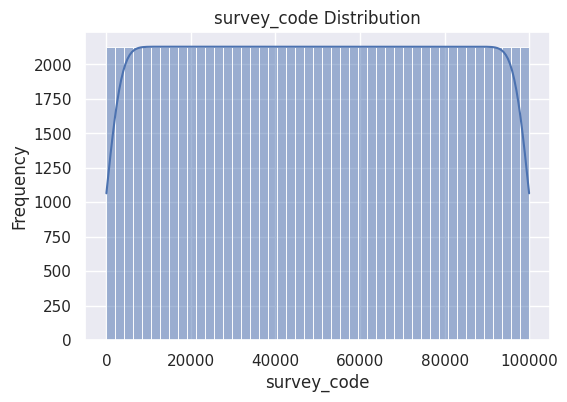

✅ Saved plot: survey_code_distribution.png

count    100000.000000
mean         48.525990
std          17.886768
min          18.000000
25%          33.000000
50%          48.000000
75%          64.000000
max          79.000000
Name: age, dtype: float64


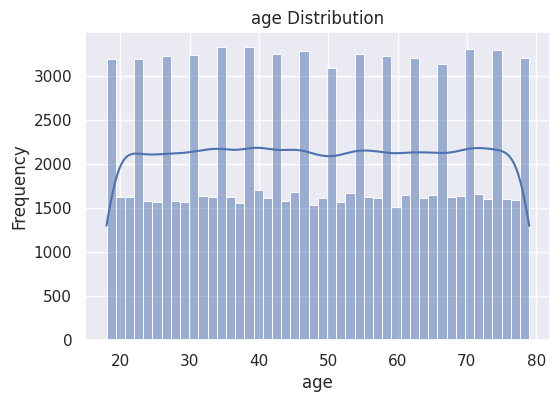

✅ Saved plot: age_distribution.png

count    100000.000000
mean        170.023707
std           9.982798
min         140.000000
25%         163.306615
50%         170.016778
75%         176.728920
max         210.000000
Name: height, dtype: float64


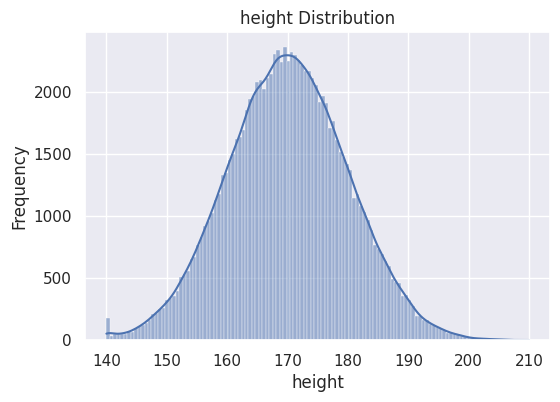

✅ Saved plot: height_distribution.png

count    100000.000000
mean         70.064862
std          14.693667
min          40.000000
25%          59.856938
50%          69.924141
75%          80.027418
max         139.250894
Name: weight, dtype: float64


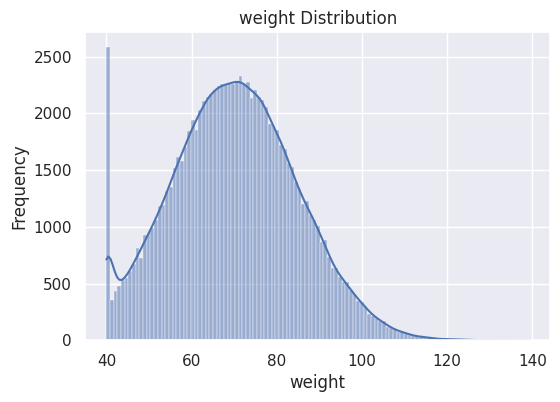

✅ Saved plot: weight_distribution.png

count    100000.000000
mean         24.493876
std           5.951069
min           9.988495
25%          20.271405
50%          24.156734
75%          28.258696
max          59.234792
Name: bmi, dtype: float64


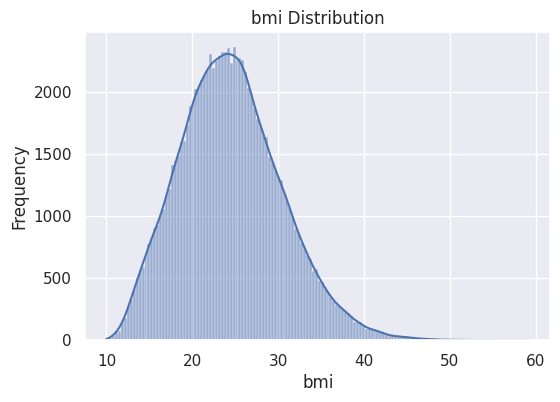

✅ Saved plot: bmi_distribution.png

count    100000.000000
mean         24.493876
std           5.951069
min           9.988495
25%          20.271405
50%          24.156734
75%          28.258696
max          59.234792
Name: bmi_estimated, dtype: float64


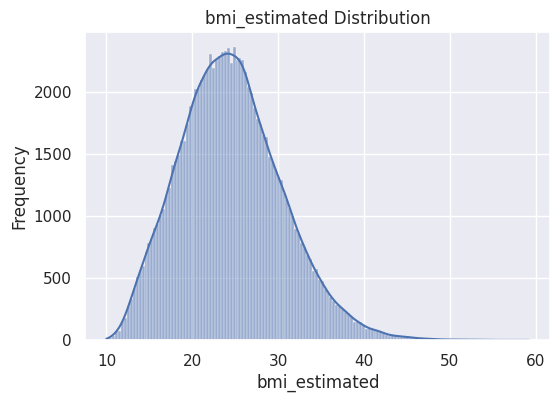

✅ Saved plot: bmi_estimated_distribution.png

count    100000.000000
mean         73.481627
std          17.853206
min          29.965484
25%          60.814215
50%          72.470201
75%          84.776088
max         177.704377
Name: bmi_scaled, dtype: float64


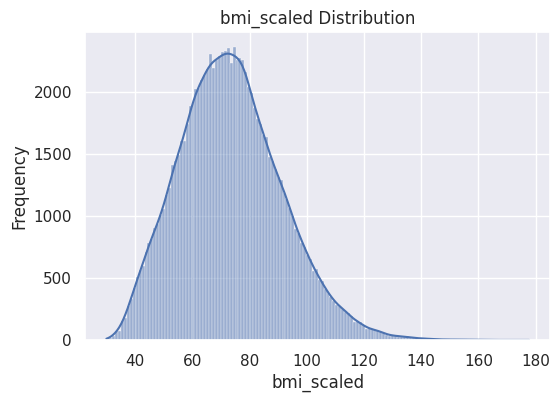

✅ Saved plot: bmi_scaled_distribution.png

count    100000.000000
mean         24.494140
std           5.954184
min           9.893845
25%          20.271059
50%          24.151699
75%          28.247648
max          59.142646
Name: bmi_corrected, dtype: float64


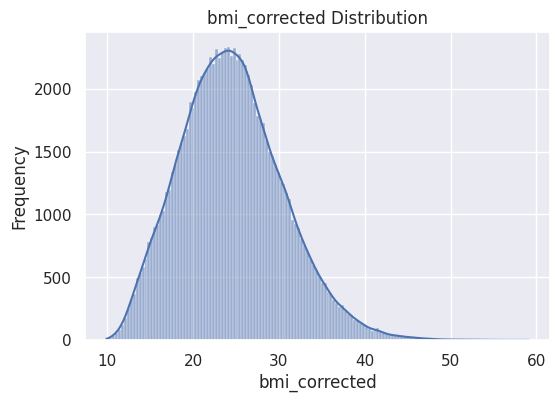

✅ Saved plot: bmi_corrected_distribution.png

count    100000.000000
mean         84.933043
std          12.040314
min          34.093185
25%          76.795185
50%          84.957139
75%          93.018713
max         133.153631
Name: waist_size, dtype: float64


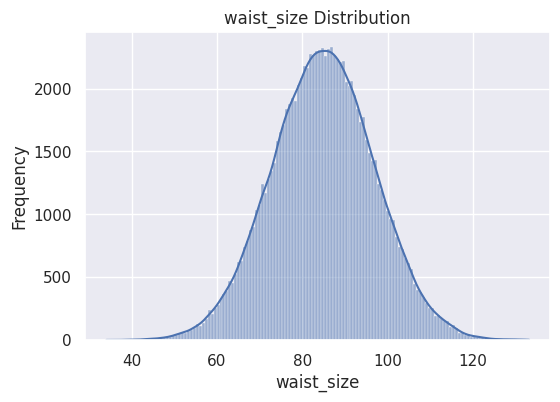

✅ Saved plot: waist_size_distribution.png

count    92331.000000
mean       119.980149
std         15.015503
min         59.128168
25%        109.812060
50%        119.951794
75%        130.120621
max        184.439195
Name: blood_pressure, dtype: float64


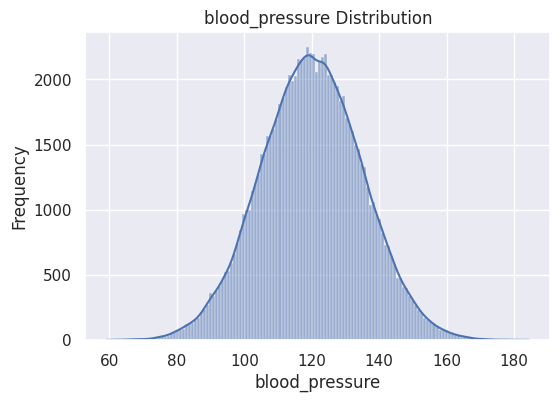

✅ Saved plot: blood_pressure_distribution.png

count    85997.000000
mean        74.969177
std          9.941668
min         34.745092
25%         68.275432
50%         75.046211
75%         81.685914
max        114.136041
Name: heart_rate, dtype: float64


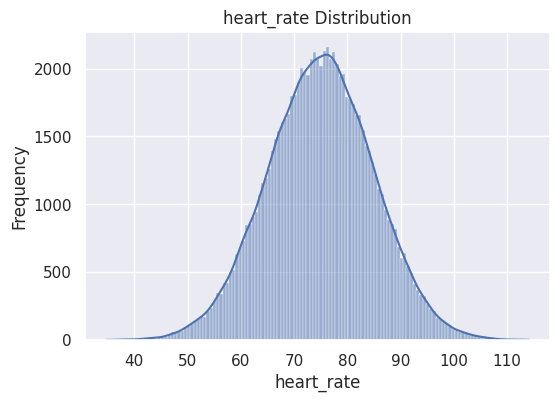

✅ Saved plot: heart_rate_distribution.png

count    100000.000000
mean        189.966438
std          29.981934
min          58.410902
25%         169.667738
50%         190.044579
75%         210.222005
max         319.875613
Name: cholesterol, dtype: float64


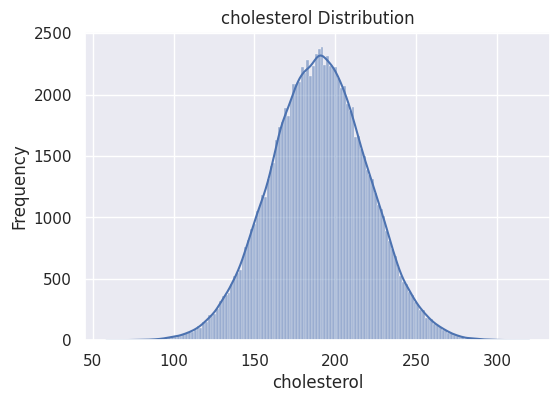

✅ Saved plot: cholesterol_distribution.png

count    100000.000000
mean         99.994538
std          19.982828
min          12.434931
25%          86.461401
50%          99.986834
75%         113.508722
max         183.883548
Name: glucose, dtype: float64


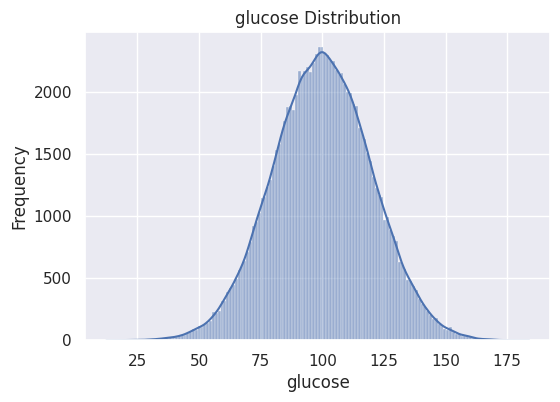

✅ Saved plot: glucose_distribution.png

count    84164.000000
mean        14.988258
std          5.002783
min         -6.794483
25%         11.627114
50%         14.983414
75%         18.361928
max         35.464749
Name: insulin, dtype: float64


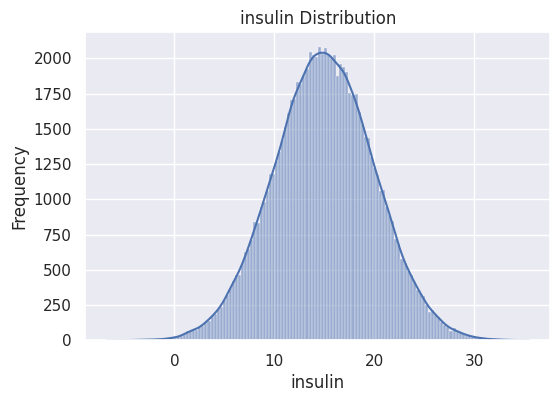

✅ Saved plot: insulin_distribution.png

count    100000.000000
mean          7.002008
std           1.496821
min           3.000000
25%           5.986781
50%           6.998164
75%           8.019219
max          12.000000
Name: sleep_hours, dtype: float64


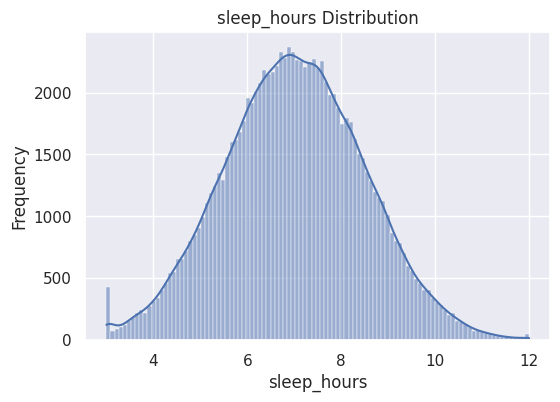

✅ Saved plot: sleep_hours_distribution.png

count    100000.000000
mean          8.001331
std           1.994723
min           0.000000
25%           6.651093
50%           8.004549
75%           9.353669
max          16.000000
Name: work_hours, dtype: float64


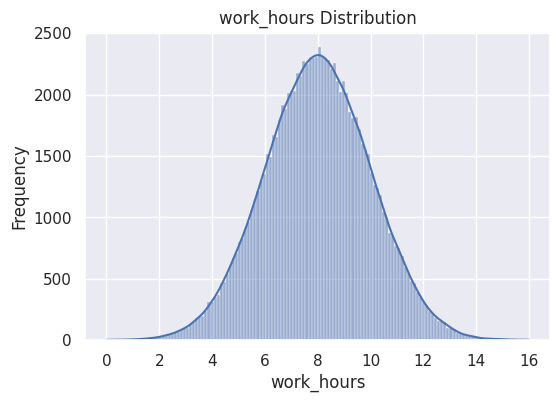

✅ Saved plot: work_hours_distribution.png

count    100000.000000
mean          3.038344
std           1.884475
min           0.000000
25%           1.633799
50%           2.971222
75%           4.326500
max          11.631898
Name: physical_activity, dtype: float64


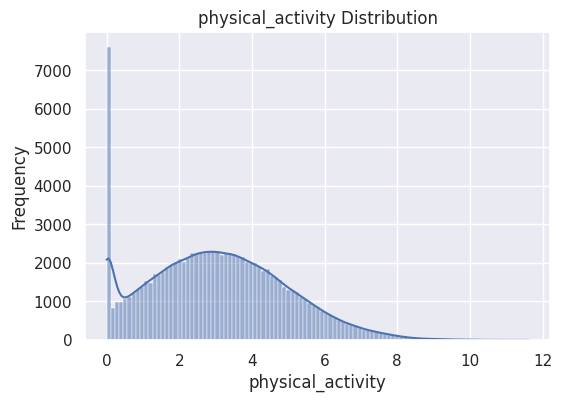

✅ Saved plot: physical_activity_distribution.png

count    91671.000000
mean      7012.925748
std       2488.989356
min       1000.000000
25%       5320.858377
50%       7004.285450
75%       8702.281300
max      18064.969543
Name: daily_steps, dtype: float64


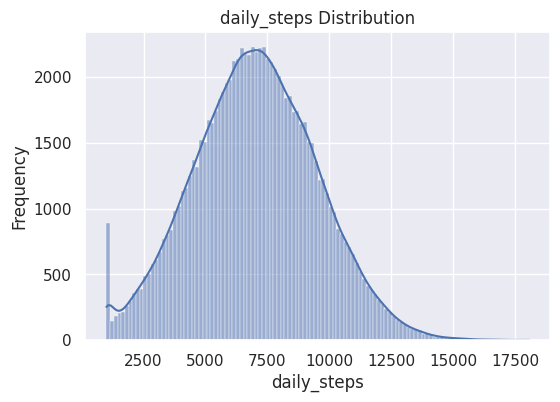

✅ Saved plot: daily_steps_distribution.png

count    100000.000000
mean       2201.428579
std         400.516318
min         527.172360
25%        1932.278165
50%        2200.992765
75%        2471.218160
max        3949.019017
Name: calorie_intake, dtype: float64


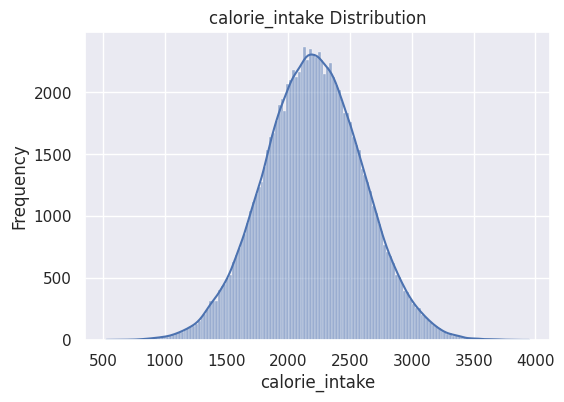

✅ Saved plot: calorie_intake_distribution.png

count    100000.000000
mean         60.047165
std          19.966850
min         -27.882444
25%          46.504292
50%          60.047905
75%          73.476386
max         141.514522
Name: sugar_intake, dtype: float64


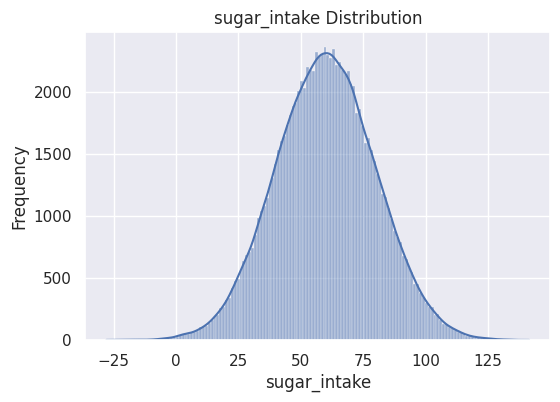

✅ Saved plot: sugar_intake_distribution.png

count    100000.000000
mean          2.006373
std           0.688868
min           0.500000
25%           1.532011
50%           2.000659
75%           2.473047
max           5.000000
Name: water_intake, dtype: float64


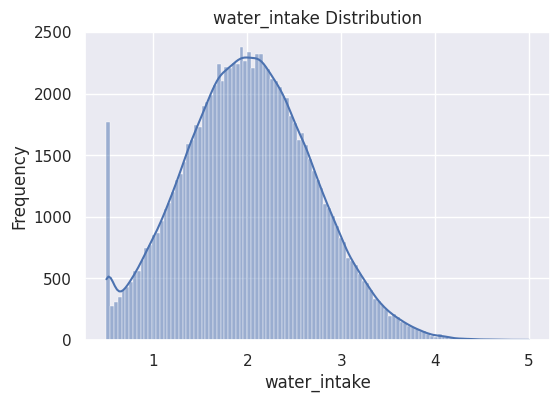

✅ Saved plot: water_intake_distribution.png

count    100000.000000
mean          6.021525
std           2.933835
min           0.000000
25%           3.971318
50%           5.991171
75%           8.024470
max          16.000000
Name: screen_time, dtype: float64


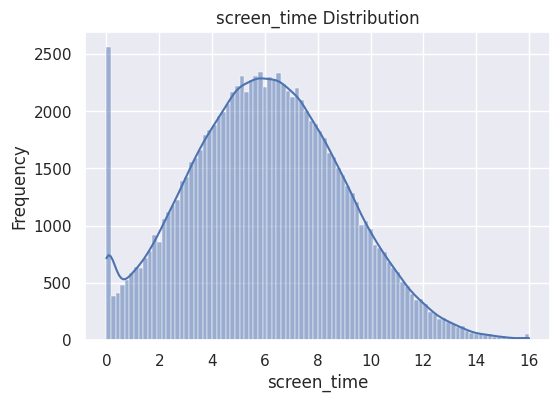

✅ Saved plot: screen_time_distribution.png

count    100000.000000
mean          4.991600
std           3.154997
min           0.000000
25%           2.000000
50%           5.000000
75%           8.000000
max          10.000000
Name: stress_level, dtype: float64


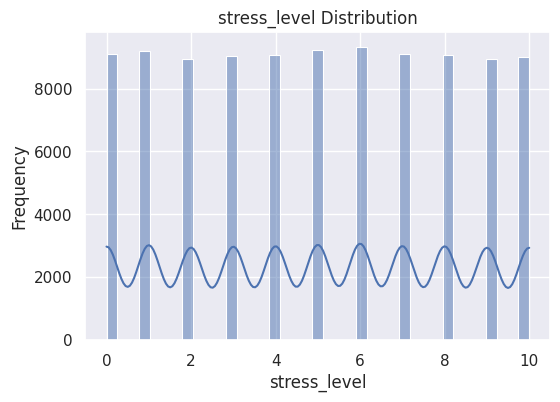

✅ Saved plot: stress_level_distribution.png

count    100000.000000
mean          5.004680
std           3.164228
min           0.000000
25%           2.000000
50%           5.000000
75%           8.000000
max          10.000000
Name: mental_health_score, dtype: float64


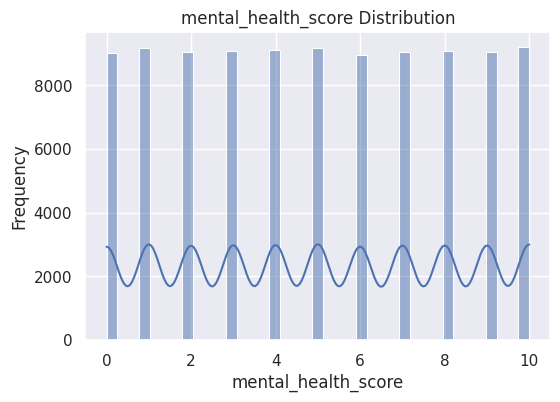

✅ Saved plot: mental_health_score_distribution.png

count    91530.000000
mean      4038.127284
std       1930.025678
min        500.000000
25%       2665.402843
50%       4004.601345
75%       5360.012694
max      12029.409353
Name: income, dtype: float64


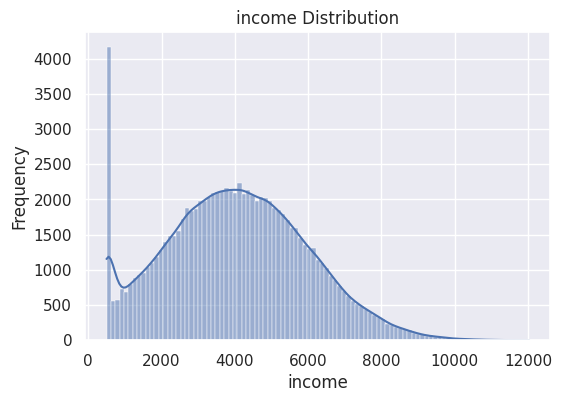

✅ Saved plot: income_distribution.png

count    100000.000000
mean          2.998720
std           1.414786
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           5.000000
Name: meals_per_day, dtype: float64


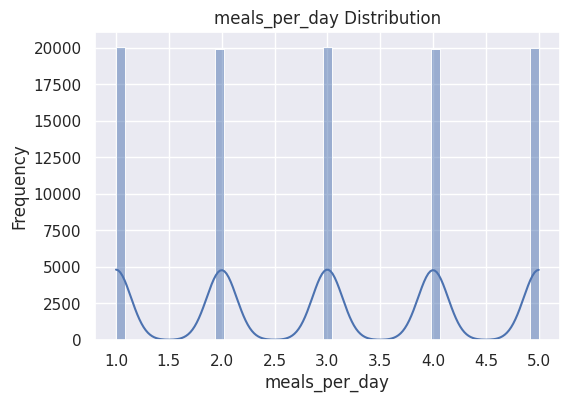

✅ Saved plot: meals_per_day_distribution.png

count    100000.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: electrolyte_level, dtype: float64


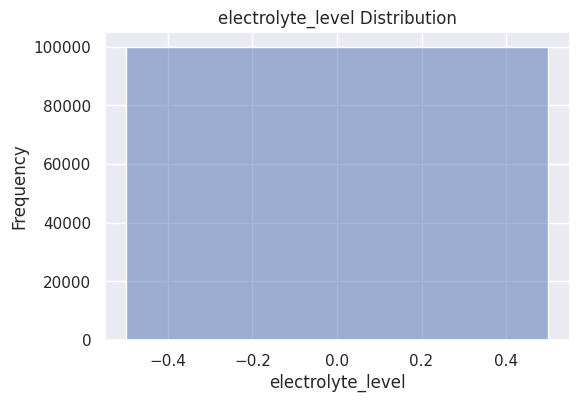

✅ Saved plot: electrolyte_level_distribution.png

count    89526.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: gene_marker_flag, dtype: float64


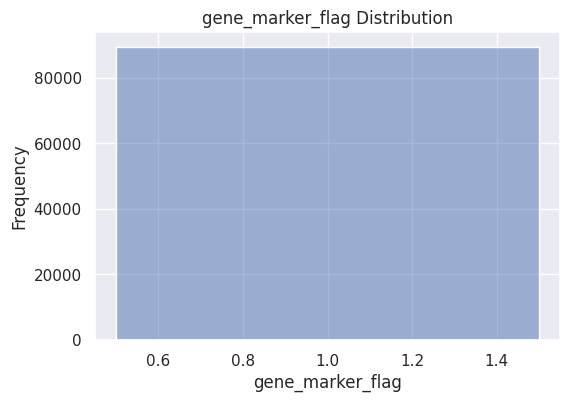

✅ Saved plot: gene_marker_flag_distribution.png

count    100000.0
mean          5.5
std           0.0
min           5.5
25%           5.5
50%           5.5
75%           5.5
max           5.5
Name: environmental_risk_score, dtype: float64


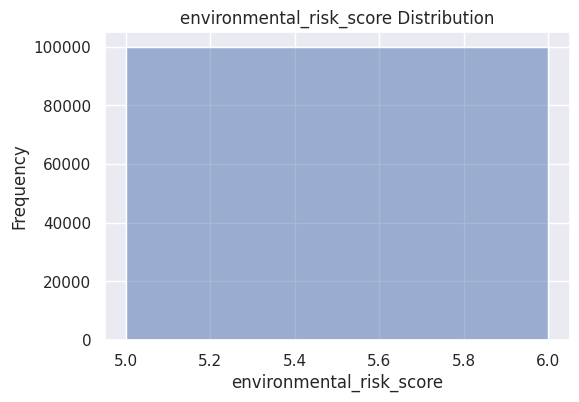

✅ Saved plot: environmental_risk_score_distribution.png

count    100000.000000
mean          0.015726
std           5.764489
min          -9.999895
25%          -4.980501
50%           0.015589
75%           5.008424
max           9.999966
Name: daily_supplement_dosage, dtype: float64


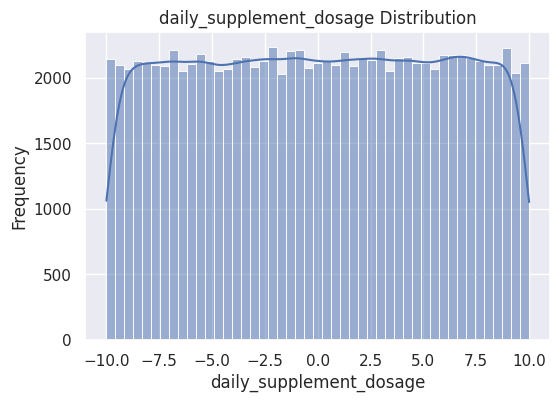

✅ Saved plot: daily_supplement_dosage_distribution.png



In [ ]:
num_cols = [col for col in df.columns if df[col].dtype != "O" and col != "target"]

def summary_numeric(col):
    # Print basic descriptive stats
    print(df[col].describe())

    # Create the histogram
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Save the plot as PNG file
    filename = f"{col}_distribution.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    # Show the plot
    plt.show()

    # Optional: confirm saving
    print(f"✅ Saved plot: {filename}\n")

for col in num_cols:
    summary_numeric(col)

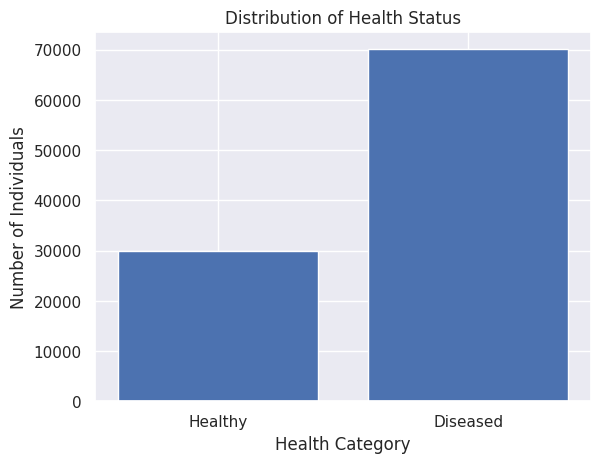

In [ ]:
counts = df['target'].value_counts().sort_index()

# Plot as a bar chart
plt.bar(['Healthy', 'Diseased'], counts)
plt.title('Distribution of Health Status')
plt.ylabel('Number of Individuals')
plt.xlabel('Health Category')
# Save the plot as PNG file
filename = f"healh_status_distribution.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Drop non-informative ID column
df = df.drop(columns=['survey_code'])
# Make sure labels are numeric
y = df['target'].map({'healthy': 0, 'diseased': 1}).astype('int32')

# Rebuild X from scratch
X = df.drop(columns=['target'])

# Split first (so we fit scalers on train only)
from sklearn.model_selection import train_test_split
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Numeric/categorical split
num_cols = X_train_df.select_dtypes(include=['float64','int64','int32','float32']).columns
cat_cols = X_train_df.select_dtypes(include=['object']).columns

# Impute
X_train_df[num_cols] = X_train_df[num_cols].fillna(X_train_df[num_cols].median())
X_test_df[num_cols]  = X_test_df[num_cols].fillna(X_train_df[num_cols].median())

X_train_df[cat_cols] = X_train_df[cat_cols].fillna('Unknown')
X_test_df[cat_cols]  = X_test_df[cat_cols].fillna('Unknown')

# One-hot encode categoricals
import pandas as pd
X_train_df = pd.get_dummies(X_train_df, columns=cat_cols, drop_first=True)
X_test_df  = pd.get_dummies(X_test_df,  columns=cat_cols, drop_first=True)

# Align columns (important when train/test OHE produce different columns)
X_train_df, X_test_df = X_train_df.align(X_test_df, join='left', axis=1, fill_value=0)

# Scale numeric-like data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_df.values)
X_test  = scaler.transform(X_test_df.values)

# Convert to proper numpy dtypes and RNN shape
X_train = np.asarray(X_train, dtype='float32')[:, None, :]  # (samples, 1, features)
X_test  = np.asarray(X_test,  dtype='float32')[:, None, :]
y_train = np.asarray(y_train, dtype='float32')              # (samples,)
y_test  = np.asarray(y_test,  dtype='float32')


In [ ]:
model = Sequential([
    Input(shape=(1, X_train.shape[2])),
    SimpleRNN(8, activation='tanh'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    X_train, y_train,
    epochs=20, batch_size=256,
    validation_split=0.2,
    verbose=1
)

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {acc:.3f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │           616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 777 (3.04 KB)

 Trainable params: 777 (3.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6948 - loss: 0.6192 - val_accuracy: 0.7000 - val_loss: 0.6116
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7005 - loss: 0.6114 - val_accuracy: 0.7000 - val_loss: 0.6112
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6998 - loss: 0.6112 - val_accuracy: 0.7000 - val_loss: 0.6112
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7054 - loss: 0.6063 - val_accuracy: 0.7000 - val_loss: 0.6109
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7000 - loss: 0.6109 - val_accuracy: 0.7000 - val_loss: 0.6109
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7012 - loss: 0.6097 - val_accuracy: 0.7000 - val_loss: 0.6109
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7017 - loss: 0.6090 - val_accuracy: 0.7000 - val_loss: 0.6110
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7023 - loss: 0.6084 - val_accuracy: 0.

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
== Train ==
Accuracy : 0.700975
F1 Score : 0.0
Precision: 0.0
Recall   : 0.0
AUC      : 0.5339515167759679

== Test ==
Accuracy : 0.70095
F1 Score : 0.0
Precision: 0.0
Recall   : 0.0
AUC      : 0.5006688620057627

Classification Report (Test):
              precision    recall  f1-score   support

     Healthy      0.701     1.000     0.824     14019
    Diseased      0.000     0.000     0.000      5981

    accuracy                          0.701     20000
   macro avg      0.350     0.500     0.412     20000
weighted avg      0.491     0.701     0.578     20000



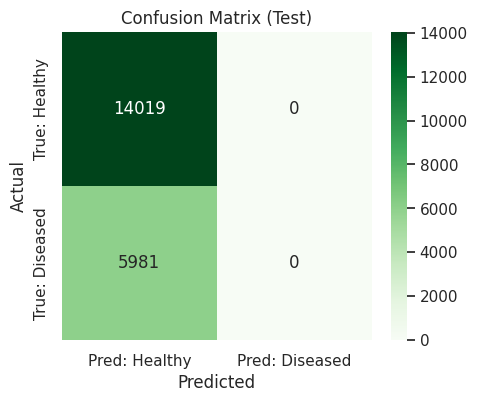

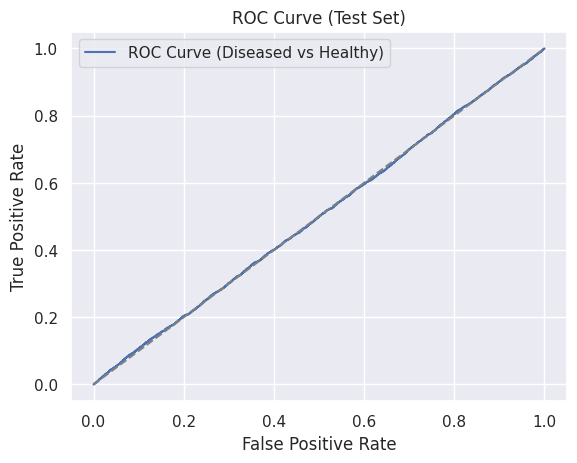

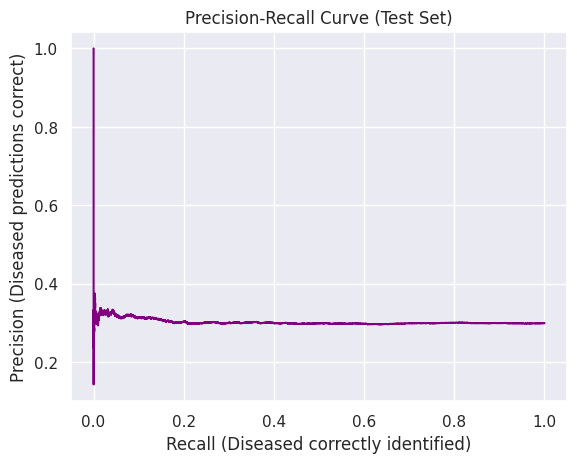

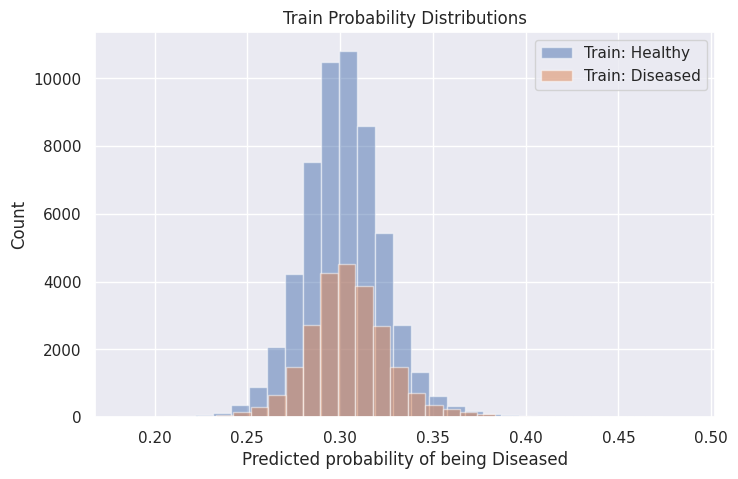

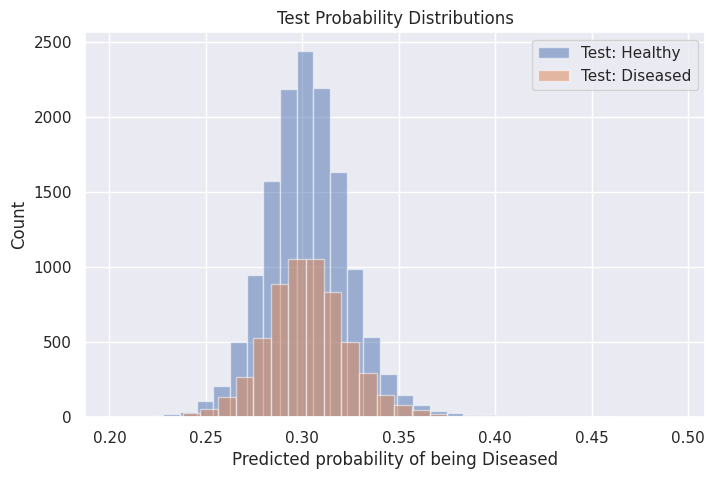


Best test accuracy: 0.701 at threshold=0.475 (F1=0.000)


In [ ]:

# 1) Predict probabilities (sigmoid outputs in [0,1])
train_proba = model.predict(X_train).ravel()
test_proba  = model.predict(X_test).ravel()

# 2) Convert to class labels with a threshold (default 0.5)
thr = 0.5
train_pred = (train_proba >= thr).astype(int)
test_pred  = (test_proba  >= thr).astype(int)

# 3) Metrics
print("== Train ==")
print("Accuracy :", accuracy_score(y_train, train_pred))
print("F1 Score :", f1_score(y_train, train_pred))
print("Precision:", precision_score(y_train, train_pred))
print("Recall   :", recall_score(y_train, train_pred))
print("AUC      :", roc_auc_score(y_train, train_proba))

print("\n== Test ==")
print("Accuracy :", accuracy_score(y_test, test_pred))
print("F1 Score :", f1_score(y_test, test_pred))
print("Precision:", precision_score(y_test, test_pred))
print("Recall   :", recall_score(y_test, test_pred))
print("AUC      :", roc_auc_score(y_test, test_proba))

print("\nClassification Report (Test):")
target_names = ['Healthy', 'Diseased']
print(classification_report(y_test, test_pred, target_names=target_names, digits=3))

# 4) Confusion matrix (test)
cm = confusion_matrix(y_test, test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Pred: Healthy', 'Pred: Diseased'],
            yticklabels=['True: Healthy', 'True: Diseased'])
plt.title("Confusion Matrix (Test)")
plt.ylabel("Actual")
plt.xlabel("Predicted")
# Save the plot as PNG file
filename = f"Confusion_Matrix.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

# 5) ROC curve (test)
fpr, tpr, _ = roc_curve(y_test, test_proba)
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve (Diseased vs Healthy)")
plt.plot([0, 1], [0, 1], linestyle="--", color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Test Set)")
plt.legend()
# Save the plot as PNG file
filename = f"false_true.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

# 6) Precision-Recall curve (test)
prec, rec, _ = precision_recall_curve(y_test, test_proba)
plt.figure()
plt.plot(rec, prec, color='purple')
plt.xlabel("Recall (Diseased correctly identified)")
plt.ylabel("Precision (Diseased predictions correct)")
plt.title("Precision-Recall Curve (Test Set)")
# Save the plot as PNG file
filename = f"recall_diseased_predictions.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

# 7) Probability histograms (confidence visualization)
plt.figure(figsize=(8,5))
plt.hist(train_proba[y_train == 0], bins=30, alpha=0.5, label="Train: Healthy")
plt.hist(train_proba[y_train == 1], bins=30, alpha=0.5, label="Train: Diseased")
plt.xlabel("Predicted probability of being Diseased")
plt.ylabel("Count")
plt.title("Train Probability Distributions")
plt.legend()
# Save the plot as PNG file
filename = f"predicted_probability_train.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(8,5))
plt.hist(test_proba[y_test == 0], bins=30, alpha=0.5, label="Test: Healthy")
plt.hist(test_proba[y_test == 1], bins=30, alpha=0.5, label="Test: Diseased")
plt.xlabel("Predicted probability of being Diseased")
plt.ylabel("Count")
plt.title("Test Probability Distributions")
plt.legend()
# Save the plot as PNG file
filename = f"predicted_probability_test.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

# 8) Optional: find best threshold for accuracy
best = (0, 0, 0)
for thr_try in np.linspace(0.2, 0.8, 25):
    pred_try = (test_proba >= thr_try).astype(int)
    acc_try = accuracy_score(y_test, pred_try)
    f1_try  = f1_score(y_test, pred_try)
    if acc_try > best[0]:
        best = (acc_try, thr_try, f1_try)

print(f"\nBest test accuracy: {best[0]:.3f} at threshold={best[1]:.3f} (F1={best[2]:.3f})")




=== Model Comparison (Test Set) ===
               Model  Accuracy       F1  Precision   Recall      AUC  Threshold
Keras RNN (thr=0.48)   0.70100 0.000334        1.0 0.000167 0.500669      0.475
Keras RNN (thr=0.50)   0.70095 0.000000        0.0 0.000000 0.500669      0.500
      HGB (thr=0.50)   0.70095 0.000000        0.0 0.000000 0.495838      0.500
      HGB (thr=0.38)   0.70095 0.000000        0.0 0.000000 0.495838      0.375


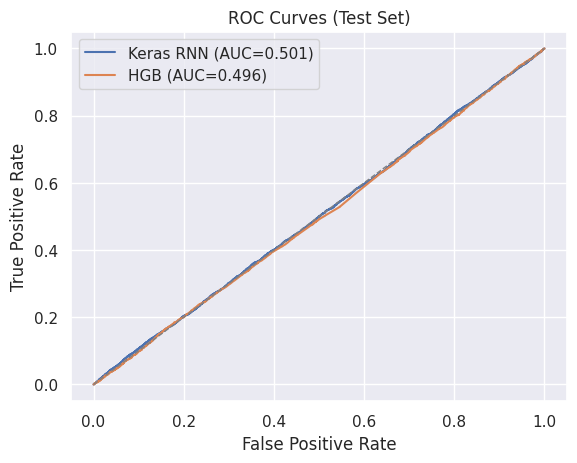

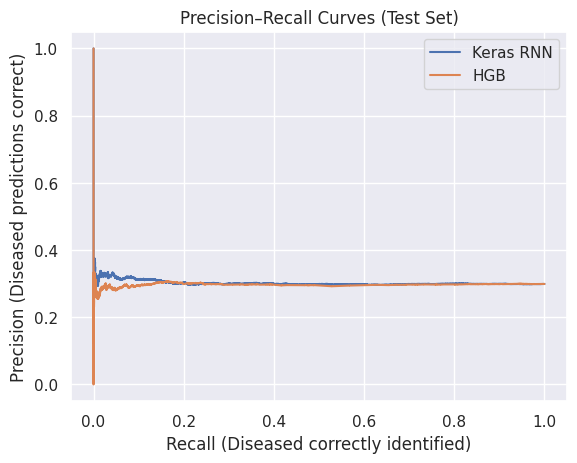

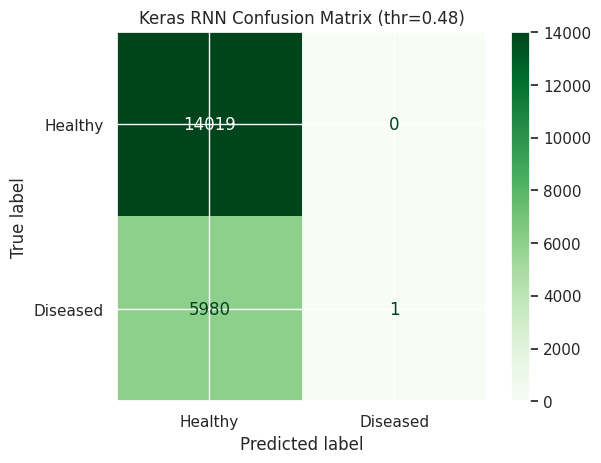

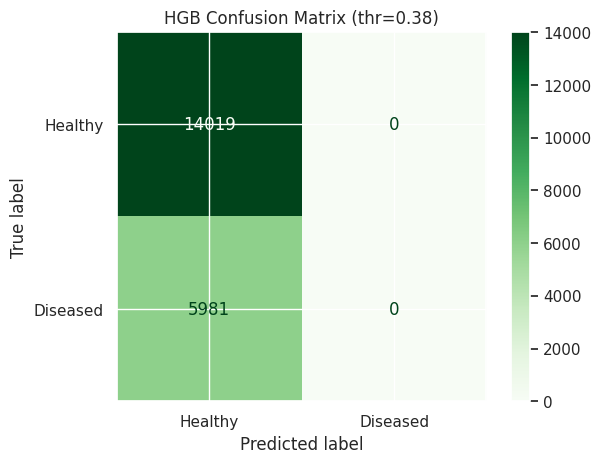

In [ ]:
# =========================
# Compare with HistGradientBoostingClassifier
# =========================

# 1) Keras (RNN) probabilities already computed as: train_proba, test_proba
#    We keep them and compute a metrics dict helper for both models.
def compute_metrics(y_true, proba, thr=0.5, name="model"):
    pred = (proba >= thr).astype(int)
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_true, pred),
        "F1": f1_score(y_true, pred),
        "Precision": precision_score(y_true, pred),
        "Recall": recall_score(y_true, pred),
        "AUC": roc_auc_score(y_true, proba),
        "Threshold": thr
    }

# Optional: best threshold search (accuracy) for a probability vector
def best_threshold(y_true, proba, grid=np.linspace(0.2, 0.8, 25)):
    best_acc, best_thr, best_f1 = 0.0, 0.5, 0.0
    for t in grid:
        pred = (proba >= t).astype(int)
        acc = accuracy_score(y_true, pred)
        f1  = f1_score(y_true, pred)
        if acc > best_acc:
            best_acc, best_thr, best_f1 = acc, t, f1
    return best_acc, best_thr, best_f1

# 2) Train HistGradientBoosting on the SAME features (2D arrays)
X_train_2d = X_train.squeeze(axis=1)
X_test_2d  = X_test.squeeze(axis=1)

hgb = HistGradientBoostingClassifier(
    learning_rate=0.05,
    max_leaf_nodes=31,
     max_iter=600,
    l2_regularization=1.0,
    early_stopping=True,
    validation_fraction=0.1,
    random_state=42
)
hgb.fit(X_train_2d, y_train)

hgb_train_proba = hgb.predict_proba(X_train_2d)[:, 1]
hgb_test_proba  = hgb.predict_proba(X_test_2d)[:, 1]

# 3) Metrics at default 0.5
keras_05 = compute_metrics(y_test, test_proba, thr=0.5, name="Keras RNN (thr=0.50)")
hgb_05   = compute_metrics(y_test, hgb_test_proba, thr=0.5, name="HGB (thr=0.50)")

# 4) Also show each model at its best accuracy threshold (quick sweep)
k_best_acc, k_best_thr, k_best_f1 = best_threshold(y_test, test_proba)
h_best_acc, h_best_thr, h_best_f1 = best_threshold(y_test, hgb_test_proba)

keras_best = compute_metrics(y_test, test_proba, thr=k_best_thr, name=f"Keras RNN (thr={k_best_thr:.2f})")
hgb_best   = compute_metrics(y_test, hgb_test_proba, thr=h_best_thr, name=f"HGB (thr={h_best_thr:.2f})")

# 5) Side-by-side comparison table
comparison = pd.DataFrame([keras_05, keras_best, hgb_05, hgb_best])
print("\n=== Model Comparison (Test Set) ===")
print(comparison.sort_values(by="Accuracy", ascending=False).to_string(index=False))

# 6) ROC curves (overlay)
fpr_k, tpr_k, _ = roc_curve(y_test, test_proba)
fpr_h, tpr_h, _ = roc_curve(y_test, hgb_test_proba)

plt.figure()
plt.plot(fpr_k, tpr_k, label=f"Keras RNN (AUC={roc_auc_score(y_test, test_proba):.3f})")
plt.plot(fpr_h, tpr_h, label=f"HGB (AUC={roc_auc_score(y_test, hgb_test_proba):.3f})")
plt.plot([0,1], [0,1], linestyle="--", color="gray", linewidth=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves (Test Set)")
plt.legend()
# Save the plot as PNG file
filename = f"false_positive.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

# 7) Precision–Recall curves (overlay)
prec_k, rec_k, _ = precision_recall_curve(y_test, test_proba)
prec_h, rec_h, _ = precision_recall_curve(y_test, hgb_test_proba)

plt.figure()
plt.plot(rec_k, prec_k, label="Keras RNN")
plt.plot(rec_h, prec_h, label="HGB")
plt.xlabel("Recall (Diseased correctly identified)")
plt.ylabel("Precision (Diseased predictions correct)")
plt.title("Precision–Recall Curves (Test Set)")
plt.legend()
# Save the plot as PNG file
filename = f"Precision_Recall_Curves.png"
plt.savefig(filename, dpi=300, bbox_inches='tight')
plt.show()

# 8) Confusion matrices at each model's best threshold
def show_cm(y_true, proba, thr, title):
    pred = (proba >= thr).astype(int)
    disp = ConfusionMatrixDisplay(
        confusion_matrix(y_true, pred),
        display_labels=["Healthy", "Diseased"]
    )
    disp.plot(values_format='d', cmap='Greens')
    plt.title(title)
    # Save the plot as PNG file
    filename = f"conf_matrix.png"
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

show_cm(y_test, test_proba, k_best_thr, f"Keras RNN Confusion Matrix (thr={k_best_thr:.2f})")
show_cm(y_test, hgb_test_proba, h_best_thr, f"HGB Confusion Matrix (thr={h_best_thr:.2f})")


In [ ]:
corrs = []
for col in X_train_df.columns[:50]:  # limit to top 50 to keep it readable
    try:
        corr = np.corrcoef(X_train_df[col], y_train)[0,1]
        corrs.append((col, corr))
    except:
        pass

corrs = sorted(corrs, key=lambda x: abs(x[1]), reverse=True)
pd.DataFrame(corrs, columns=['feature','corr_with_target']).head(20)

,feature,corr_with_target
0,work_hours,-0.011048
1,electrolyte_level,NaN
2,gene_marker_flag,NaN
3,environmental_risk_score,NaN
4,sleep_quality_Poor,0.008747
5,daily_steps,-0.007211
6,job_type_Office,-0.007104
7,alcohol_consumption_Unknown,0.005905
8,sleep_quality_Good,-0.005791
9,age,0.005556
